<a href="https://colab.research.google.com/github/netmatze/mlmatze/blob/main/create_word2vec_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import libaries and define corpus

In [1]:
import numpy as np
import tensorflow as tf
#corpus = 'He is the king . The king is royal . She is the royal queen'
corpus = 'batman is good . superman is good . tanos is bad . ultron is bad . spiderman is good '
corpus = corpus.lower()

### create words

In [2]:
words = []
for word in corpus.split():
  if word != '.':
    words.append(word)

### create unique words and translation dictionaries

In [3]:
unique_words = set(words)
word2int = {}
int2word = {}

vocabolary_size = len(unique_words)

for i, word in enumerate(unique_words):
  word2int[word] = i
  int2word[i] = word

In [4]:
print(words)
print(unique_words)
print(vocabolary_size)
print(word2int['batman'])
print(int2word[1])

['batman', 'is', 'good', 'superman', 'is', 'good', 'tanos', 'is', 'bad', 'ultron', 'is', 'bad', 'spiderman', 'is', 'good']
{'batman', 'superman', 'is', 'bad', 'spiderman', 'good', 'tanos', 'ultron'}
8
0
superman


### split sentences

In [5]:
sentences = corpus.split('.')
train_sentences = []
for sentence in sentences:
  train_sentences.append(sentence.split())
print(train_sentences)

[['batman', 'is', 'good'], ['superman', 'is', 'good'], ['tanos', 'is', 'bad'], ['ultron', 'is', 'bad'], ['spiderman', 'is', 'good']]


### prepare training data pairs

In [6]:
train_data = []

WINDOW_SIZE = 2

for sentence in train_sentences:
  for index, word in enumerate(sentence):
    for nearby_word in sentence[max(index - WINDOW_SIZE, 0) : min(index + WINDOW_SIZE, len(sentence)) + 1] : 
      if nearby_word != word:
        train_data.append([word, nearby_word])
print(train_data)

[['batman', 'is'], ['batman', 'good'], ['is', 'batman'], ['is', 'good'], ['good', 'batman'], ['good', 'is'], ['superman', 'is'], ['superman', 'good'], ['is', 'superman'], ['is', 'good'], ['good', 'superman'], ['good', 'is'], ['tanos', 'is'], ['tanos', 'bad'], ['is', 'tanos'], ['is', 'bad'], ['bad', 'tanos'], ['bad', 'is'], ['ultron', 'is'], ['ultron', 'bad'], ['is', 'ultron'], ['is', 'bad'], ['bad', 'ultron'], ['bad', 'is'], ['spiderman', 'is'], ['spiderman', 'good'], ['is', 'spiderman'], ['is', 'good'], ['good', 'spiderman'], ['good', 'is']]


### create function that creates one hot encoding

In [7]:
def create_one_hot_encoding(index, vocabolary_size):
  array = np.zeros(vocabolary_size)
  array[index]  = 1
  return array

### create trainings data to calculate the embeddings (X_train, y_train)

In [8]:
X_train = []
y_train = []

for word in train_data:
  X_train.append(create_one_hot_encoding(word2int[word[0]], vocabolary_size))
  y_train.append(create_one_hot_encoding(word2int[word[1]], vocabolary_size))

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape, y_train.shape)
print(X_train[:3])
print(y_train[:3])

(30, 8) (30, 8)
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


### create and train embedding_model

In [9]:
from tensorflow import keras

EMBEDDING_DIMENSION = 3

embedding_model = keras.Sequential([
    keras.Input(shape=(vocabolary_size)),
    keras.layers.Dense(units=EMBEDDING_DIMENSION, name="embedding"),
    keras.layers.Dense(units=vocabolary_size, activation='softmax', name="output")
])

# embedding_model = keras.Sequential([
#   keras.layers.Embedding(input_dim=vocabolary_size, output_dim=EMBEDDING_DIMENSION, input_length=vocabolary_size),
#   keras.layers.Flatten(),
#   keras.layers.Dense(vocabolary_size, activation='softmax'),
#   keras.layers.Softmax(),
#   ])

learning_rate = 0.01
epochs = 1500

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

embedding_model.summary()

METRICS = [
          tf.keras.metrics.CategoricalAccuracy(),
          ]

embedding_model.compile(optimizer=optimizer, 
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

history = embedding_model.fit(
    X_train, 
    y_train,
    epochs=epochs)

vectors = embedding_model.layers[0].get_weights()[0]
print(vectors)

print(f"embedding for batman: {vectors[word2int['batman']]}")
print(f"embedding for superman: {vectors[word2int['superman']]}")
print(f"embedding for spiderman: {vectors[word2int['spiderman']]}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Dense)           (None, 3)                 27        
                                                                 
 output (Dense)              (None, 8)                 32        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
1/1 [==============================] - 1s 933ms/step - loss: 2.0025 - categorical_accuracy: 0.2000
Epoch 2/1500
1/1 [==============================] - 0s 14ms/step - loss: 1.9833 - categorical_accuracy: 0.2000
Epoch 3/1500
1/1 [==============================] - 0s 14ms/step - loss: 1.9648 - categorical_accuracy: 0.2000
Epoch 4/1500
1/1 [==============================] - 0s 16ms/step - loss: 1.9470 - categorical_accuracy: 0.3000
Epoch 5/150

### show embedding model summary

In [10]:
embedding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Dense)           (None, 3)                 27        
                                                                 
 output (Dense)              (None, 8)                 32        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


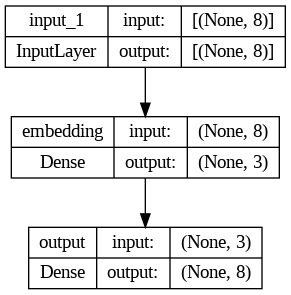

In [11]:
tf.keras.utils.plot_model(embedding_model, show_shapes=True) #to_file=dot_img_file,

### print out embedding vectors for batman, superman and spiderman

In [12]:
print(vectors)

print(f"batman: {vectors[word2int['batman']]}")
print(f"superman: {vectors[word2int['superman']]}")
print(f"spiderman: {vectors[word2int['spiderman']]}")

[[-3.8687137e-01  1.3305326e+00 -2.1120355e+00]
 [-3.4980658e-01  1.3972455e+00 -2.3031785e+00]
 [-1.7331507e+00  1.7289615e+00  2.1145902e+00]
 [ 2.4741282e+00  1.4062732e+00  1.9146232e-03]
 [-3.3599657e-01  1.4144278e+00 -2.3303633e+00]
 [-2.0452588e+00 -2.5909450e+00 -9.6803755e-01]
 [ 1.3934656e+00 -1.6505252e+00  1.3232571e+00]
 [ 1.5162675e+00 -2.0699496e+00  1.3601490e+00]]
batman: [-0.38687137  1.3305326  -2.1120355 ]
superman: [-0.34980658  1.3972455  -2.3031785 ]
spiderman: [-0.33599657  1.4144278  -2.3303633 ]


### calculate euclidean distance between two vectors

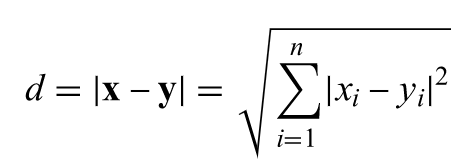

In [13]:
def calculate_euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

### find closest vector by the index of an given vector

In [14]:
def find_closest(word_index, vectors):
    min_dist = 10000
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        distance = calculate_euclidean_dist(vector, query_vector)
        print(f'{distance}, {int2word[word_index]} - {int2word[index]}')
        if calculate_euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = calculate_euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

### find the word in the embedding vectors for an given vector

In [15]:
def find_word_for_vector(query_vector, vectors):
  for index, vector in enumerate(vectors):
      distance = calculate_euclidean_dist(vector, query_vector)
      if np.array_equal(vector, query_vector):
         return int2word[index]
  return ""

### find closesed word of a given word

In [16]:
print(int2word[find_closest(word2int['batman'], vectors)])
print(int2word[find_closest(word2int['superman'], vectors)])
print(int2word[find_closest(word2int['spiderman'], vectors)])

0.0, batman - batman
0.2058156579732895, batman - superman
4.453714847564697, batman - is
3.5580670833587646, batman - bad
0.23936094343662262, batman - spiderman
4.408737659454346, batman - good
4.88441801071167, batman - tanos
5.219318389892578, batman - ultron
superman
0.2058156579732895, superman - batman
0.0, superman - superman
4.641158580780029, superman - is
3.6452908515930176, superman - bad
0.03499935194849968, superman - spiderman
4.534625053405762, superman - good
5.047666549682617, superman - tanos
5.37807035446167, superman - ultron
spiderman
0.23936094343662262, spiderman - batman
0.03499935194849968, spiderman - superman
4.669966220855713, spiderman - is
3.651902198791504, spiderman - bad
0.0, spiderman - spiderman
4.56295108795166, spiderman - good
5.0728607177734375, spiderman - tanos
5.402929306030273, spiderman - ultron
superman


### use PCA to reduce the vector size to two

In [17]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

model = PCA(n_components=2)

np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

### display the PCA reduced vectors and show the closeness of calculated word embeddings

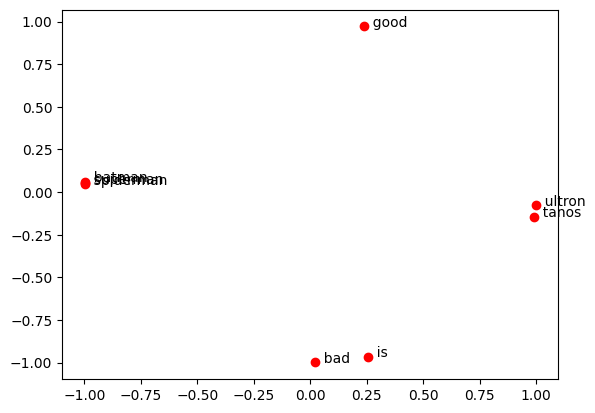

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(vectors[:,0], vectors[:,1], color='red')

for i, vector in enumerate(vectors):
    txt = find_word_for_vector(vector, vectors)
    ax.annotate(f'  {txt}', (vector[0], vector[1]))
plt.show()